In [2]:
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [3]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [4]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
#qnm.download_data()

In [5]:
import glob
json_files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json',recursive = True)

In [6]:
import importlib
importlib.reload(sxs)
conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Eccentricity',['>=0.01','<=0.50']]])
ritcat=sxs.SXS_catalogue("/work/francisco.jimenez/RIT/Data",conditions,catalogue="RIT")

systems=np.array([ritcat.metadata(j,parameters_list=['catalog-tag','system-type','eccentricity','relaxed-mass-ratio-1-over-2',
                                                     'final-mass','final-chi','initial-bh-chi1z','initial-bh-chi2z','freq-start-22']) for j in json_files])

/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
len(systems)

1881

In [8]:
boolean= np.array(['e' in elist for elist in systems[:,0]])

for i in range(len(systems)):
    if 'e' in systems[:,0][i] and float(systems[:,2][i])<0.5:
        boolean[i]=True
    else:
        boolean[i]=False

ecc_prec_cases=systems[boolean]
boolean = np.array(['Precessing' not in elist for elist in ecc_prec_cases])
ecc_cases=ecc_prec_cases[boolean]
ecc_cases[:,2]=np.array([float(i[2]) for i in ecc_cases])
ecc_cases[:,3]=np.array([1/float(i[3]) for i in ecc_cases])
ecc_cases[:,4]=np.array([float(i[4]) for i in ecc_cases])
ecc_cases[:,5]=np.array([float(i[5]) for i in ecc_cases])
ecc_tags=ecc_cases[:,0]


h5_files=[glob.glob('/work/francisco.jimenez/RIT/Data/*'+j.replace(':','-')+'*',recursive = True)[0] for j in ecc_tags]

In [9]:
modes=[[2,2]]
#ecc_tags,len(ecc_tags)
#h5_files

In [10]:
wave={}
ecc_cases_noq1=[]
#for i in range(len(h5_files)):
for i in range(2):
    try:
        tag=ecc_tags[i]
        wave[tag]=sxs.Generate_Georgia_Waveform(h5_files[i],modes,
                                        zero_align=False,
                                        sampling_rate=0.1,modes_combined=False,inclination=0,
                                        coa_phase=0,RD=False,toffset=0)
        ecc_cases_noq1.append(ecc_cases[i])

    except:
        pass

In [11]:
ecc_tags[0]

'RIT:eBBH:1173'

In [12]:
ecc_cases_noq1

[array(['RIT:eBBH:1173', 'Nonspinning', '0.2', '3.999974051104801',
        '0.9784859393', '0.4757486824', '0', '0', '0.007390109739'],
       dtype='<U20'),
 array(['RIT:eBBH:1180', 'Nonspinning', '0.235', '3.999980227499274',
        '0.9772204428', '0.4770698194', '0', '0', '0.007390109739'],
       dtype='<U20')]

In [13]:
wave[ecc_tags[0]][0][:,1]

array([-6.08093546e-23-4.91213137e-45j, -3.33883743e-08-1.12610032e-14j,
       -5.82951381e-08-3.43609541e-14j, ...,
        1.15730450e-08+2.33281949e-17j,  5.83086979e-09+5.97960765e-18j,
        0.00000000e+00+0.00000000e+00j])

/work/kailai.wang/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


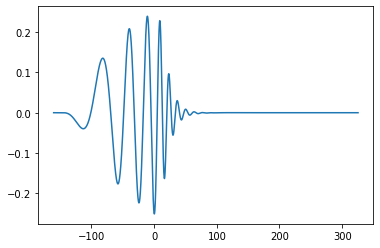

In [14]:
plt.plot(wave[ecc_tags[1]][0][:,0],wave[ecc_tags[1]][0][:,1])

In [15]:
ecc_cases_noq1_v1=np.array(ecc_cases_noq1)
print(ecc_cases_noq1_v1)

[['RIT:eBBH:1173' 'Nonspinning' '0.2' '3.999974051104801' '0.9784859393'
  '0.4757486824' '0' '0' '0.007390109739']
 ['RIT:eBBH:1180' 'Nonspinning' '0.235' '3.999980227499274'
  '0.9772204428' '0.4770698194' '0' '0' '0.007390109739']]


Found! RIT:eBBH:1173
system type: Nonspinning
eccentricity 0.2
relaxed_mass_ratio_1_over_2: 3
final_mass: 0.9784859393
final_chi: 0.4757486824
initial_bh_chi1z: 0
initial_bh_chi2z: 0
initial_freq: 0.007390109739
times[0] -348.0


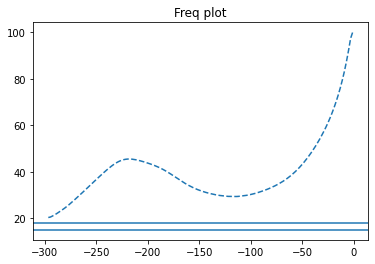

In [16]:
for i in range(0,1):
    tag=ecc_tags[i]
    wave[tag]=sxs.Generate_Georgia_Waveform(h5_files[i],modes,
                                    zero_align=False,
                                    sampling_rate=0.1,modes_combined=False,inclination=0,
                                    coa_phase=0,RD=False,toffset=0)
    rit_t=wave[ecc_tags[i]][0][:,0]
    rit_h=wave[ecc_tags[i]][0][:,1]
    #----------------------------------------------------------------------
    for name in ecc_cases:
        if name[0]==ecc_tags[i]:
            ritwavename=str(name[0])
            print("Found! " + str(name[0]))
            system_type=name[1]
            print("system type: " + str(system_type))
            eccentricity = name[2]
            print("eccentricity "+str(eccentricity))
            relaxed_mass_ratio_1_over_2=[3][0]
            print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
            final_mass=name[4]
            print("final_mass: "+ str(final_mass))
            final_chi=name[5]
            print("final_chi: "+ str(final_chi))
            initial_bh_chi1z=name[6]
            print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
            initial_bh_chi2z=name[7]
            print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
            initial_freq=float(name[8])
            print(("initial_freq: "+ str(initial_freq)))
    #----------------------------------------------------------------------
    initial_freq=1.*initial_freq
    rit_wave_int=interp1d(rit_t.real,rit_h, kind='cubic')
    mass=100
    sxs_wave_int=rit_wave_int
    times=rit_t.real
    print('times[0]',times[0])
    dt=fun.time_to_t_NR(1/1024.,mass)
    times= np.arange(times[0], times[-1], dt)
    sxs_wave = sxs_wave_int(times)
    beginning_time=times[0]

    if times[0]>-200:
            boolean=np.logical_and(times >= (times[0]+20), times<=0)
    elif times[0]>-400:
        boolean=np.logical_and(times >= (times[0]+50), times<=0)
    elif times[0]+200>=-1500:
        boolean=np.logical_and(times >= (times[0]+200), times<=0)
        #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
        #boolean=np.logical_and(times >= (-5000), times <= 0)
    else:
        boolean=np.logical_and(times >= (times[0]+200), times<=0)
        #boolean=np.logical_and(times >= (times[0]+200), times<=times[0]+5000)
        #boolean=np.logical_and(times >= (-5000), times <= 0)


    sxs_wave = sxs_wave[boolean]
    times = times[boolean]
    #----------------------------------------------------------------------
    sxsphas = np.angle(sxs_wave)
    sxsphas = np.unwrap(sxsphas)
    sxsfreq = np.gradient(sxsphas, times)
    sxsfreq_int = interp1d(times,sxsfreq,kind='cubic')
    plt.plot(times, fun.f_to_Phys(sxsfreq,mass)/(2*np.pi), '--', label=r'$\Re{(Rh_{22}/(M\nu))}$')
    plt.axhline(fun.f_to_Phys(initial_freq,mass))
    plt.axhline(fun.f_to_Phys(1.2*initial_freq,mass))
    plt.title("Freq plot")
    plt.show()
    #----------------------------------------------------------------------
    ecc_nr=eccentricity
    massratio=relaxed_mass_ratio_1_over_2
    mass1=100*1/(massratio+1)*massratio
    mass2=100*1/(massratio+1)
    spin1=float(initial_bh_chi1z)
    spin2=float(initial_bh_chi2z)
    omega_0=initial_freq*2*np.pi
    T_0= 2*np.pi/omega_0
    f_0 = omega_0/(2*np.pi)

In [17]:
distance=100
model='TSEOBNRE'
emin=0.
emax=0.3
if float(eccentricity)>0.3:
    emax=float(eccentricity)
initial_freq_phys=fun.f_to_Phys(initial_freq,100)
print("initial_freq ", initial_freq_phys)
fmin=initial_freq_phys
fmax=2*initial_freq_phys

ecc_clas=fun.Eccentricity_PE([mass1,mass2,spin1,spin2,distance],
                              sxsfreq_int,model=model,times=times,sxsfreq=sxsfreq,
                              emin=emin,emax=emax,fmin=initial_freq_phys,fmax=1.5*initial_freq_phys)
ecc_clas.log_likelihood([0.1,10])

initial_freq  15.006968144780863


-0.07746411008419542

In [ ]:
vars_ml22=[]

print(eccentricity)
print(fmin)
initial22=[float(eccentricity),1.1*fmin]
print("initial22: ", initial22)
massratio=[]
ecc=[]
chi_eff=[]
chi_a=[]


#Probably PE_loglikelihood here
#rdowlike=log_likelihood
rdowlike=ecc_clas.log_likelihood
nll = lambda *args: -rdowlike(*args)

#bnds = ((emin, emax), (fmin, fmax))
bnds = ((emin, emax), (fmin, fmax))
print("bnds ", bnds)
#bnds = (())
soln = minimize(nll, initial22,method='SLSQP', bounds=bnds)
print(soln.x)

0.2
15.006968144780863
initial22:  [0.2, 16.50766495925895]
bnds  ((0.0, 0.3), (15.006968144780863, 30.013936289561727))


In [ ]:
# dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
# bvals=np.array([0.19,17])


# # times_phys = fun.time_to_t_Phys(times,mass)
# plt.plot(times_teob, h, color="blue",label="dynesty values")

# dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
# bvals=np.array([0.20417812,15.28334803])
# times_teob, h= dict[model](bvals,strain=True)
# times_phys = fun.time_to_t_Phys(times,mass)
# plt.plot(times_teob, h, color="red", label="opimized values")


# plt.plot(times, sxs_wave.real, label='NR',color='g')
# plt.plot(times, np.sqrt(sxs_wave.real**2+sxs_wave.imag**2),color='g',label=None)

# plt.legend()
# plt.show()

In [ ]:
# bvals=np.array([0.141,22.14])
# bvals=np.array([0.165,19.49])
# bvals=np.array([0.180,17.67])
# bvals=np.array([ 0.20417812,15.28334803])

bvals=np.array([0.12917304,7.50348407])
bvals=np.array([0.418,7.34])
#bvals=np.array([0.462,6.56])
#bvals=np.array([0.463,7.15])
#bvals=np.array([0.29289973,7.47569599])
bvals=np.array([0.29908258,5.22910949]) #(56%)
bvals=np.array([0.31334168,7.2 ]) # (63%)
export_bool=False

dict = {'SEOBNREHM':ecc_clas.model_SEOBNREHM,'SEOBNRE':ecc_clas.model_SEOBNRE,'TSEOBNRE':ecc_clas.model_TSEOBNRE}
times_seobe, h_seobe_nr= dict[model](bvals,strain=True)
times_seobe_phys = fun.time_to_t_Phys(times_seobe,mass)

h_seobe_phys = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)

#def plot_the_data():
if times_seobe[0]>=times[0]:
    times_seobe_v1 = times_seobe[:np.argmax(times_seobe >= (100))]
    h_seobe_nr = h_seobe_nr[:np.argmax(times_seobe >= (100))]
    sxs_wave = sxs_wave_int(times_seobe_v1)
    times = times_seobe_v1
else:
    times = np.arange(times[0], 100, dt)
    sxs_wave = sxs_wave_int(times)

    eob_int=interp1d(times_seobe, h_seobe_nr, kind='cubic')
    h_seobe_nr=eob_int(times)
# plot the nr data in phys. units
figband = plt.figure(figsize = (12, 8))
paper_prefactor=0.204124145232
store=h_seobe_nr[0]
# h_seobe_nr = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)
# h_seobe_nr = fun.amp_to_nr(h_seobe_nr,mass,distance,2,2,0)
# h_seobe_nr.real = h_seobe_nr.real*(10**20)
# h_seobe_nr.imag = h_seobe_nr.imag*(10**20)
plt.plot(times, h_seobe_nr.real, label=model,color='r')
plt.plot(times, np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

#   plt.plot(times, 0.19*h_seobe_nr*(np.exp(1j*3.14)).real, label=model,color='r')
#   plt.plot(times, 0.19*np.sqrt(h_seobe_nr.real**2+h_seobe_nr.imag**2),color='r',label=None)

plt.plot(times, sxs_wave.real, label='NR',color='g')
plt.plot(times, np.sqrt(sxs_wave.real**2+sxs_wave.imag**2),color='g',label=None)
plt.xlabel(r'$t/M$')
plt.ylabel(r'$r \, h_+$')
#plt.xlim(-200,200)
plt.legend(loc='upper left')
plt.title("Data")
if export_bool:
    figband.savefig(wave_td_plot)

#----------------------------------------------------------------------------
#fourier and another plot
h_px=np.array([times,sxs_wave]).T 
h_eob=np.array([times,h_seobe_nr]).T 
tlow_nr = h_eob[0,0]+ 150
thigh_nr = 150
sigmalo = 100

tlow_eob = h_eob[0,0]+ 150
thigh_eob = 150

px_fft=fun.FFT_ZeroPadded_Windowed( h_px, nleft=1000,nright=1000,x_low=tlow_nr, sigma_low=sigmalo,x_high=thigh_nr,sigma_high=sigmalo)
eob_fft=fun.FFT_ZeroPadded_Windowed(h_eob,nleft=1000,nright=1000,x_low=tlow_eob,sigma_low=sigmalo,x_high=thigh_eob,sigma_high=sigmalo)
flow = 8
delta_f = 1.0 /16
flen = int(2048 / delta_f) + 1
frange=np.arange(flow,flow+delta_f*flen,delta_f)
psd_noise = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd_int=interp1d(frange, psd_noise, kind='cubic')

figband = plt.figure(figsize = (12, 8))
plt.plot(px_fft[:,0], np.abs(px_fft[:,1]),'b',label='NR')
plt.plot(eob_fft[:,0], np.abs(eob_fft[:,1]),'r',label=model)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlim(0.001,0.5)
plt.title("FFT")
if export_bool:
    figband.savefig(wave_fd_plot)
#----------------------------------------------------------------------------
print("Mismatch: "+ str(1-fun.EasyMatch(px_fft,eob_fft,psd_int,20,2000,nright=3000,f_units='Mf',mass=mass)))
#mismatch between different masses
mmatch=[None]*198
for m in range(10,200):
    fmin=max(fun.f_to_Phys(f_0,m),20)
    #print(fmin)
    mmatch[m-3]=1-fun.EasyMatch(px_fft,eob_fft,psd_int,fmin,1000,nright=3000,f_units='Mf',mass=m)
figband = plt.figure(figsize = (12, 9))
x=np.arange(10,208)

acc_max=-1000
for i in mmatch:
    if i!=None and i>=acc_max:
        acc_max=i
plt.plot(x, mmatch,'r',label=r'mismatch')
plt.legend(loc='upper left')
plt.title("max mismatch found: " + str(acc_max))
if export_bool:
    figband.savefig(mismatch_plot)
plt.show()
print("Max mismatch found: " + str(acc_max))